# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Understanding Data

In [2]:
raw_data = pd.read_csv('Train_Val_data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.isnull().sum()

Brand             0
Price           105
Body              0
Mileage           0
EngineV          87
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [4]:
raw_data.nunique()

Brand             7
Price           693
Body              6
Mileage         381
EngineV          66
Engine Type       4
Registration      2
Year             37
Model           267
dtype: int64

In [5]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,2425.000000,2530.000000,2443.000000,2530.000000
mean,18555.826932,163.693281,2.821731,2006.422925
std,24661.103073,103.487055,5.417107,6.690747
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,92.000000,1.800000,2003.000000
50%,10999.000000,160.000000,2.200000,2007.000000
75%,20500.000000,230.000000,3.000000,2012.000000
max,300000.000000,850.000000,99.990000,2016.000000


In [6]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,2530,2425.000000,2530,2530.000000,2443.000000,2530,2530,2530.000000,2530
unique,7,NaN,6,NaN,NaN,4,2,NaN,267
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,554,NaN,940,NaN,NaN,1189,2291,NaN,112
mean,NaN,18555.826932,NaN,163.693281,2.821731,NaN,NaN,2006.422925,NaN
std,NaN,24661.103073,NaN,103.487055,5.417107,NaN,NaN,6.690747,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6900.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,10999.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,20500.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Handling Missing Values

In [7]:
'''
values = raw_data.values
x = values[:, np.r_[0:1,2:9]]
y = values[:, 1]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
transformed_data = imputer.fit_transform(values)

col = raw_data.columns

data_trans = pd.DataFrame(data = transformed_data[0:,0:],index=(i for i in range(len(transformed_data))), columns=col)
data_trans = data_trans.drop('Model', axis=1)
data_trans['Price'] = data_trans['Price'].astype('float64')
data_trans['Mileage'] = data_trans['Mileage'].astype('int64')
data_trans['EngineV'] = data_trans['EngineV'].astype('float64')
data_trans['Year'] = data_trans['Year'].astype('int64')

'''

"\nvalues = raw_data.values\nx = values[:, np.r_[0:1,2:9]]\ny = values[:, 1]\n\nfrom sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')\ntransformed_data = imputer.fit_transform(values)\n\ncol = raw_data.columns\n\ndata_trans = pd.DataFrame(data = transformed_data[0:,0:],index=(i for i in range(len(transformed_data))), columns=col)\ndata_trans = data_trans.drop('Model', axis=1)\ndata_trans['Price'] = data_trans['Price'].astype('float64')\ndata_trans['Mileage'] = data_trans['Mileage'].astype('int64')\ndata_trans['EngineV'] = data_trans['EngineV'].astype('float64')\ndata_trans['Year'] = data_trans['Year'].astype('int64')\n\n"

# Handling outliers

In [8]:
data_cleaned = raw_data.copy()
data_cleaned = data_cleaned[data_cleaned['EngineV']<10]
data_cleaned.shape

(2428, 9)

In [9]:
data_cleaned = data_cleaned[data_cleaned['Price']<(4*np.std(data_cleaned['Price']))]
data_cleaned.shape

(2275, 9)

In [10]:
data_cleaned = data_cleaned[data_cleaned['Mileage']<(4*np.std(data_cleaned['Mileage']))]

In [11]:
data_cleaned.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.542204,0.408101,0.563665
Mileage,-0.542204,1.000000,0.043194,-0.641641
EngineV,0.408101,0.043194,1.000000,-0.022328
Year,0.563665,-0.641641,-0.022328,1.000000


In [12]:
data_cleaned.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

# Data visualization

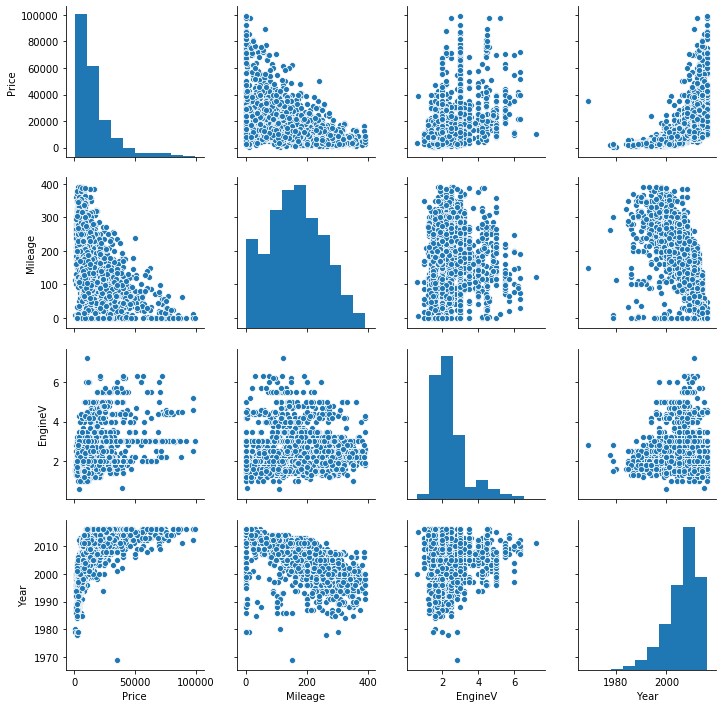

In [13]:
sns.pairplot(data_cleaned)

Text(0.5, 1.0, 'Price')

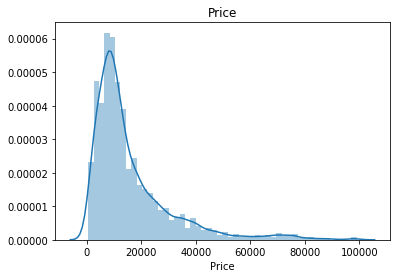

In [14]:
sns.distplot(data_cleaned['Price'])
plt.title('Price')

Text(0.5, 1.0, 'Mileage')

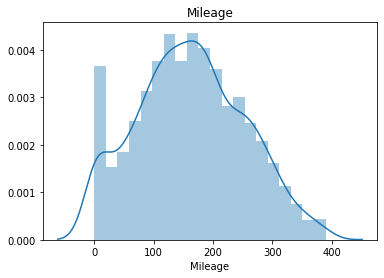

In [15]:
sns.distplot(data_cleaned['Mileage'])
plt.title('Mileage')

Text(0.5, 1.0, 'EngineV')

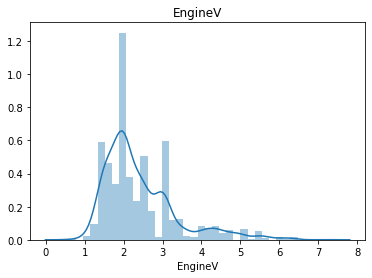

In [16]:
sns.distplot(data_cleaned['EngineV'])
plt.title('EngineV')

Text(0.5, 1.0, 'Year')

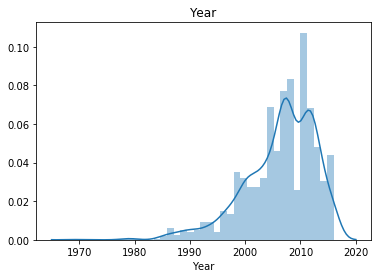

In [17]:
sns.distplot(data_cleaned['Year'])
plt.title('Year')

# Variable Transformation

In [18]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price
data_cleaned = data_cleaned.drop(['Price'], axis = 1)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
7,Audi,vagon,200,2.7,Diesel,yes,2006,A6,9.560997


In [19]:
log_Engv = np.log(data_cleaned['EngineV'])
data_cleaned['Log EngineV'] = log_Engv
data_cleaned = data_cleaned.drop(['EngineV'], axis = 1)
data_cleaned.head()

,Brand,Body,Mileage,Engine Type,Registration,Year,Model,Log Price,Log EngineV
0,BMW,sedan,277,Petrol,yes,1991,320,8.342840,0.693147
2,Mercedes-Benz,sedan,358,Gas,yes,2003,S 500,9.495519,1.609438
3,Audi,crossover,240,Petrol,yes,2007,Q7,10.043249,1.435085
4,Toyota,crossover,120,Petrol,yes,2011,Rav 4,9.814656,0.693147
7,Audi,vagon,200,Diesel,yes,2006,A6,9.560997,0.993252


In [20]:
log_year = np.log(data_cleaned['Year'])

data_cleaned['Log Year'] = log_year
data_cleaned = data_cleaned.drop(['Year'], axis=1)
data_cleaned.head()

,Brand,Body,Mileage,Engine Type,Registration,Model,Log Price,Log EngineV,Log Year
0,BMW,sedan,277,Petrol,yes,320,8.342840,0.693147,7.596392
2,Mercedes-Benz,sedan,358,Gas,yes,S 500,9.495519,1.609438,7.602401
3,Audi,crossover,240,Petrol,yes,Q7,10.043249,1.435085,7.604396
4,Toyota,crossover,120,Petrol,yes,Rav 4,9.814656,0.693147,7.606387
7,Audi,vagon,200,Diesel,yes,A6,9.560997,0.993252,7.603898


Text(0.5, 1.0, 'Log Price')

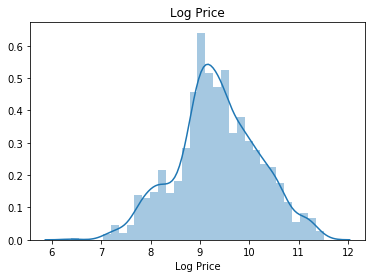

In [21]:
sns.distplot(data_cleaned['Log Price'])
plt.title('Log Price')

Text(0.5, 1.0, 'Log EngineV')

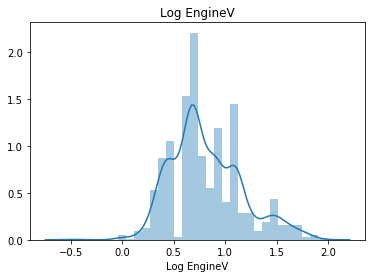

In [22]:
sns.distplot(data_cleaned['Log EngineV'])
plt.title('Log EngineV')

Text(0.5, 1.0, 'Log Year')

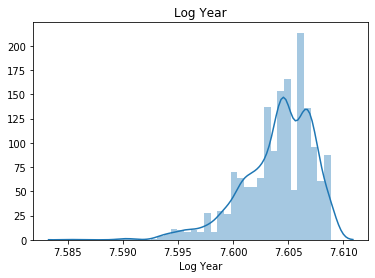

In [23]:
sns.distplot(data_cleaned['Log Year'])
plt.title('Log Year')

In [24]:
data_cleaned.corr()

,Mileage,Log Price,Log EngineV,Log Year
Mileage,1.000000,-0.566613,0.084689,-0.640770
Log Price,-0.566613,1.000000,0.405613,0.732600
Log EngineV,0.084689,0.405613,1.000000,-0.046791
Log Year,-0.640770,0.732600,-0.046791,1.000000


In [25]:
raw_data.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.471726,0.045495,0.484221
Mileage,-0.471726,1.000000,0.025036,-0.680700
EngineV,0.045495,0.025036,1.000000,-0.039275
Year,0.484221,-0.680700,-0.039275,1.000000


In [26]:
data_cleaned.isnull().sum()

Brand           0
Body            0
Mileage         0
Engine Type     0
Registration    0
Model           0
Log Price       0
Log EngineV     0
Log Year        0
dtype: int64

### The correlation has increased 

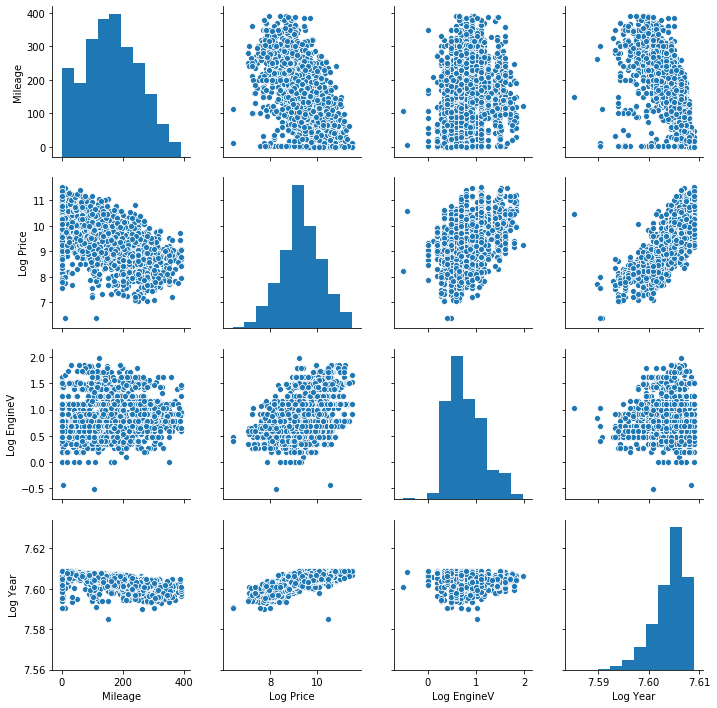

In [27]:
sns.pairplot(data_cleaned)

## Multiple Linear Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

target = data_cleaned['Log Price']
input = data_cleaned[['Log Year', 'Mileage', 'Log EngineV']]

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 10)

In [29]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
reg.predict(x_train)
reg.score(x_train, y_train)

0.7541165406929188

## Label encoding

In [31]:
## label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_enc = data_cleaned.copy()
data_enc = data_enc.apply(encoder.fit_transform)
data_enc.head()

,Brand,Body,Mileage,Engine Type,Registration,Model,Log Price,Log EngineV,Log Year
0,1,3,270,3,1,15,76,16,11
2,2,3,328,1,1,192,276,44,23
3,0,0,234,3,1,182,407,37,27
4,5,0,116,3,1,185,352,16,31
7,0,4,196,0,1,53,293,25,26


In [32]:
target = data_enc['Log Price']
input = data_enc.drop(['Log Price'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 10)

In [33]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = reg.predict(x_test)
reg.score(x_test, y_test)

0.7982973098784336

In [35]:
## Dummy variables

data_dum = data_cleaned.copy()
data_dum = data_dum.drop(['Model'], axis=1)
data_dum = pd.get_dummies(data_dum, drop_first=True)
data_dum.head()

,Mileage,Log Price,Log EngineV,Log Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,8.342840,0.693147,7.596392,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,358,9.495519,1.609438,7.602401,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,10.043249,1.435085,7.604396,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,9.814656,0.693147,7.606387,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,200,9.560997,0.993252,7.603898,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [36]:
data_dum.columns.values

array(['Mileage', 'Log Price', 'Log EngineV', 'Log Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

# Standardization

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_dum)

In [38]:
target = data_dum['Log Price']
input = data_dum.drop(['Log Price'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 10)

In [39]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = reg.predict(x_test)
reg.score(x_test, y_test)

0.8890178837550119

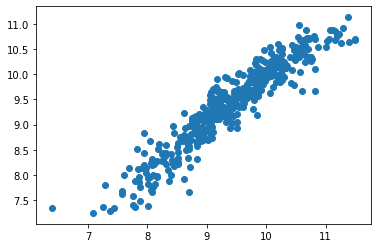

In [41]:
plt.scatter(y_test, y_pred)

In [42]:
residuals = y_test - y_pred
results = pd.DataFrame(y_test, columns=['Target'])
results['Target'] = y_test
results['Prediction'] = y_pred
results['Residuals'] = residuals
results['Difference %'] = (residuals/y_test)*100
results = results.sort_values(['Difference %'], ascending = False)
results

,Target,Prediction,Residuals,Difference %
1669,8.699515,7.655972,1.043542,11.995410
64,10.819778,9.675203,1.144575,10.578544
2442,10.596635,9.671762,0.924873,8.727986
752,8.612503,7.928313,0.684190,7.944153
2122,8.003029,7.379731,0.623298,7.788278
...,...,...,...,...
932,8.038835,8.679255,-0.640421,-7.966586
908,9.169518,9.912237,-0.742719,-8.099864
393,7.824046,8.520223,-0.696177,-8.897911
2498,7.937375,8.837382,-0.900008,-11.338857


In [43]:
np.sqrt(np.mean(residuals**2))

0.28408639549391135

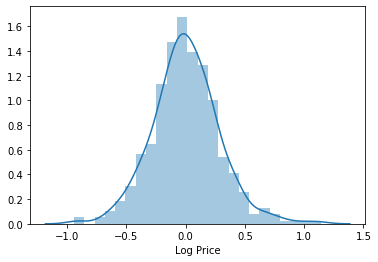

In [44]:
sns.distplot(residuals)

## Polynomial regression

In [45]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)  # with degree 2
x_poly = poly.fit_transform(input)
poly.fit(x_poly, target)

lin2 = LinearRegression()

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_poly, target, test_size = 0.2, random_state = 10)

lin2.fit(x_train_p, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred_p_t = lin2.predict(x_test_p)

In [47]:
lin2.score(x_test_p, y_test_p)

0.9026048467864495

## Using Kfold and cross val score

In [48]:
kfold = KFold(n_splits=8, shuffle=False, random_state=10)

score = cross_val_score(lin2, x_poly, target, cv=kfold, n_jobs=1)
np.mean(score)

0.892315530941324

In [49]:
predictions = cross_val_predict(lin2, x_poly, target, cv=kfold, n_jobs=1)

## Plotting residuals

In [50]:
residuals_p = y_test_p - y_pred_p_t
results = pd.DataFrame(y_test_p, columns=['Target'])
results['Target'] = y_test_p
results['Prediction'] = y_pred_p_t
results['Residuals'] = residuals_p
results['Difference %'] = (residuals_p/y_test_p)*100
results = results.sort_values(['Difference %'], ascending = False)
results

,Target,Prediction,Residuals,Difference %
2316,8.716044,7.766617,0.949427,10.892869
64,10.819778,9.649603,1.170175,10.815151
2442,10.596635,9.455564,1.141071,10.768236
1669,8.699515,7.914461,0.785054,9.024115
988,9.841612,9.009429,0.832183,8.455759
...,...,...,...,...
2498,7.937375,8.650384,-0.713009,-8.982938
393,7.824046,8.655187,-0.831141,-10.622900
1686,7.090077,7.858683,-0.768606,-10.840587
1478,7.279319,8.237183,-0.957865,-13.158712


In [51]:
np.sqrt(np.mean(residuals_p**2))

0.2661292488076619

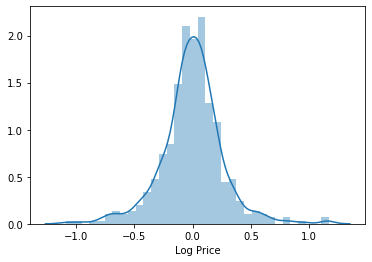

In [52]:
sns.distplot(residuals_p)

## We are getting 90+% accuracy with Polynomial regression

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50)

rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [67]:
y_pred = rf.predict(x_test)

In [68]:
rf.score(x_test, y_test)

0.8979000924368171

In [56]:
rf.feature_importances_

array([0.09793681, 0.20830104, 0.56313416, 0.00540043, 0.00602097,
       0.00664694, 0.01379823, 0.00573795, 0.0045449 , 0.00111867,
       0.00497066, 0.00559719, 0.00329189, 0.00730263, 0.00251156,
       0.00089448, 0.00421288, 0.05857862])

### Random Forest has 90+% test accuracy

## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt = dt.fit(x_train, y_train)
dt

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [58]:
dt.score(x_test, y_test)

0.8357001051003669

In [59]:
## Using Extra Tree Regressor, randomized decision tree

from sklearn.tree import ExtraTreeRegressor

edt = ExtraTreeRegressor()
edt.fit(x_train, y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=None, splitter='random')

In [60]:
edt.score(x_test, y_test)

0.8214437258935767

# Polynomial regression and random forest have 90+% accuracy

### Saving polynomial model to file

In [61]:
filename = 'finalized_model_poly_reg.sav'
joblib.dump(lin2, filename)

['finalized_model_poly_reg.sav']

### Saving random forest model

In [62]:
filename_rf = 'finalized_model_rf.sav'
joblib.dump(rf, filename_rf)

['finalized_model_rf.sav']